In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
pd.set_option("display.max_columns", 50)

### Load IPL 2018 data

In [27]:
dftt = pd.read_csv("data/df_syed2018_preprocessed_allMatches.csv")
dftt

,Unnamed: 0,match_id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,0,3,2018,Kolkata,NaN,Delhi,Tamil Nadu,NaN,NaN,normal,0,Delhi,0,8,NaN,"Eden Gardens, Kolkata",NaN,NaN,NaN,1,Tamil Nadu,Delhi,1,1,Bharath Shankar,NaN,Sangwan,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,0,3,2018,Kolkata,NaN,Delhi,Tamil Nadu,NaN,NaN,normal,0,Delhi,0,8,NaN,"Eden Gardens, Kolkata",NaN,NaN,NaN,1,Tamil Nadu,Delhi,1,2,Bharath Shankar,NaN,Sangwan,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
2,0,3,2018,Kolkata,NaN,Delhi,Tamil Nadu,NaN,NaN,normal,0,Delhi,0,8,NaN,"Eden Gardens, Kolkata",NaN,NaN,NaN,1,Tamil Nadu,Delhi,1,3,Bharath Shankar,NaN,Sangwan,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
3,0,3,2018,Kolkata,NaN,Delhi,Tamil Nadu,NaN,NaN,normal,0,Delhi,0,8,NaN,"Eden Gardens, Kolkata",NaN,NaN,NaN,1,Tamil Nadu,Delhi,1,4,Washington Sundar,Bharath Shankar,Sangwan,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
4,0,3,2018,Kolkata,NaN,Delhi,Tamil Nadu,NaN,NaN,normal,0,Delhi,0,8,NaN,"Eden Gardens, Kolkata",NaN,NaN,NaN,1,Tamil Nadu,Delhi,1,5,Bharath Shankar,Washington Sundar,Sangwan,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
5,0,3,2018,Kolkata,NaN,Delhi,Tamil Nadu,NaN,NaN,normal,0,Delhi,0,8,NaN,"Eden Gardens, Kolkata",NaN,NaN,NaN,1,Tamil Nadu,Delhi,1,6,Bharath Shankar,Washington Sundar,Sangwan,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
6,0,3,2018,Kolkata,NaN,Delhi,Tamil Nadu,NaN,NaN,normal,0,Delhi,0,8,NaN,"Eden Gardens, Kolkata",NaN,NaN,NaN,1,Tamil Nadu,Delhi,2,1,Washington Sundar,Bharath Shankar,Lalit M Yadav,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
7,0,3,2018,Kolkata,NaN,Delhi,Tamil Nadu,NaN,NaN,normal,0,Delhi,0,8,NaN,"Eden Gardens, Kolkata",NaN,NaN,NaN,1,Tamil Nadu,Delhi,2,2,Washington Sundar,Bharath Shankar,Lalit M Yadav,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
8,0,3,2018,Kolkata,NaN,Delhi,Tamil Nadu,NaN,NaN,normal,0,Delhi,0,8,NaN,"Eden Gardens, Kolkata",NaN,NaN,NaN,1,Tamil Nadu,Delhi,2,3,Washington Sundar,Bharath Shankar,Lalit M Yadav,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
9,0,3,2018,Kolkata,NaN,Delhi,Tamil Nadu,NaN,NaN,normal,0,Delhi,0,8,NaN,"Eden Gardens, Kolkata",NaN,NaN,NaN,1,Tamil Nadu,Delhi,2,4,Bharath Shankar,Washington Sundar,Lalit M Yadav,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [28]:
dftt["match_id"].unique()

array([ 3,  4,  7,  8, 11, 12, 15, 16, 19, 20, 21])

In [35]:
tournament = "kpl"
filepath = "data/df_"+tournament+"2018_preprocessed_allMatches.csv" #ipl, bbl, blast, bpl, cpl, psl
dfps, dfp = get_player_stats(filepath, tournament)
dfps["team"].unique()

array(['Belagavi Panthers', 'Bellary Tuskers', 'Bengaluru Blasters',
       'Bijapur Bulls', 'Hubli Tigers', 'Mysuru Warriors',
       'Shivamogga Lions'], dtype=object)

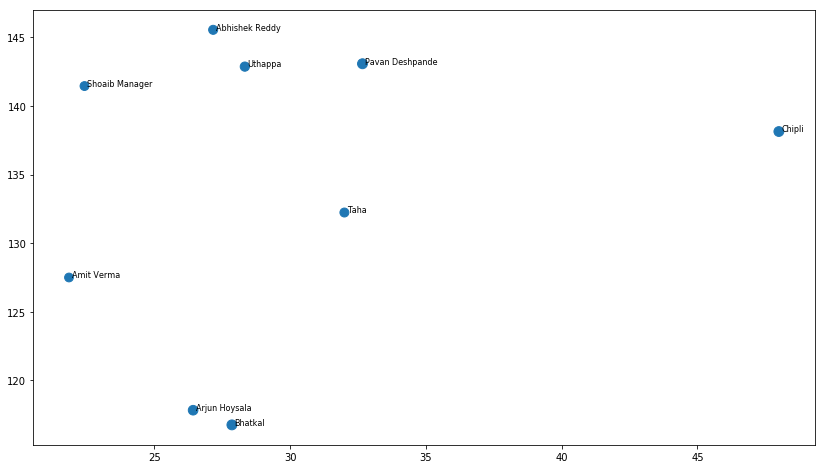

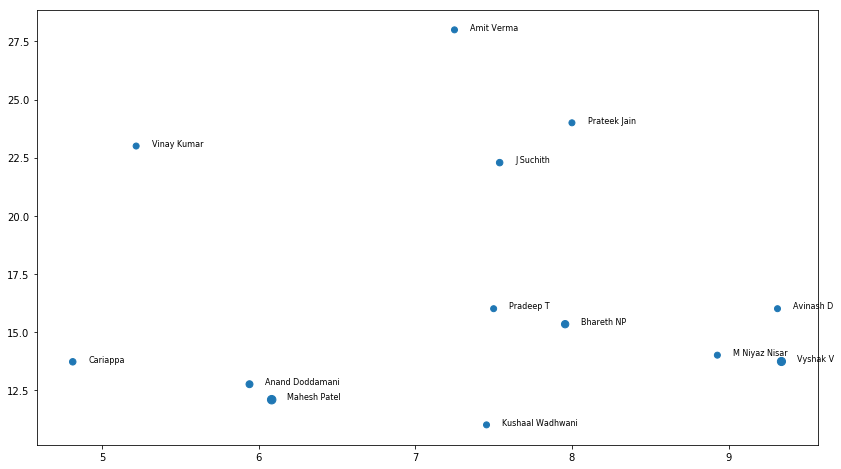

In [36]:
tournament = "kpl"
filepath = "data/df_"+tournament+"2018_preprocessed_allMatches.csv" #ipl, bbl, blast, bpl, cpl, psl
dfps, dfp = get_player_stats(filepath, tournament)

if tournament == "bbl":
    # Only for BBL (Handle D'Arcy Short aliases)
    df_short = dfps[(dfps["player"]=="D'Arcy Short") | (dfps["player"]=="DArcy Short")].groupby(["season","team"]).sum().reset_index()
    df_short["bat_avg"] = df_short["runs_scored"] / df_short["num_innings"]
    df_short["bat_sr"] = df_short["runs_scored"] / df_short["balls_faced"] * 100
    df_short["bowl_econ"] = df_short["runs_conceded"] / df_short["balls_bowled"] * 6
    df_short["player"] = "D'Arcy Short"
    dfps = dfps[(dfps["player"]!="D'Arcy Short") & (dfps["player"]!="DArcy Short")]
    dfps = dfps.append(df_short)
    dfps = dfps[["season", "team", "player", "runs_scored", "balls_faced", "num_innings",
                 "wickets", "balls_bowled", "runs_conceded", "bat_avg", "bat_sr", "bowl_avg",
                 "bowl_sr","bowl_econ"]]

dfps_bat = dfps.copy()
plot_batting_stats(dfps_bat,"")
dfps_bowl = dfps.copy()
plot_bowling_stats(dfps_bowl,"")


dfps_bowler = dfps.dropna(subset=["bowl_econ", "bowl_sr"])[["player", "season", "team", "wickets", "bowl_econ", "bowl_sr"]]
dfps_bowler = dfps_bowler[dfps_bowler["wickets"] > 6]
dfps_bowler["bowl_econ"] = np.round(dfps_bowler["bowl_econ"],2)
dfps_bowler["bowl_sr"] = np.round(dfps_bowler["bowl_sr"],2)
#dfps_bowler.to_csv("code/data/"+tournament+"_2018_bowling.csv", index=False)
#dfps_bowler

dfps_batsman = dfps.dropna(subset=["bat_avg", "bat_sr"])[["player", "season", "team", "runs_scored", "bat_avg", "bat_sr"]]
#dfps_batsman = dfps_batsman[dfps_batsman["runs_scored"] > 150]
#dfps_batsman["runs_scored"] = dfps_batsman["runs_scored"].astype(int)
dfps_batsman["bat_avg"] = np.round(dfps_batsman["bat_avg"],2)
dfps_batsman["bat_sr"] = np.round(dfps_batsman["bat_sr"],2)
dfps_batsman["player"] = dfps_batsman["player"].astype(str)
#dfps_batsman.to_csv("code/data/"+tournament+"_2018_batting.csv", index=False)
#dfps_batsman

In [37]:
dfps_bowler.sort_values("wickets", ascending=False)

,player,season,team,wickets,bowl_econ,bowl_sr
66,Mahesh Patel,2018,Hubli Tigers,12.0,6.08,12.08
86,Vyshak V,2018,Mysuru Warriors,11.0,9.34,13.73
77,Bhareth NP,2018,Mysuru Warriors,9.0,7.96,15.33
29,Anand Doddamani,2018,Bengaluru Blasters,8.0,5.94,12.75
49,Cariappa,2018,Bijapur Bulls,7.0,4.81,13.71
79,J Suchith,2018,Mysuru Warriors,7.0,7.54,22.29


In [38]:
dfps_batsman.sort_values("runs_scored", ascending=False)

,player,season,team,runs_scored,bat_avg,bat_sr
39,Pavan Deshpande,2018,Bengaluru Blasters,196.0,32.67,143.07
78,Bhatkal,2018,Mysuru Warriors,195.0,27.86,116.77
50,Chipli,2018,Bijapur Bulls,192.0,48.00,138.13
76,Arjun Hoysala,2018,Mysuru Warriors,185.0,26.43,117.83
43,Uthappa,2018,Bengaluru Blasters,170.0,28.33,142.86
61,Abhishek Reddy,2018,Hubli Tigers,163.0,27.17,145.54
73,Taha,2018,Hubli Tigers,160.0,32.00,132.23
84,Shoaib Manager,2018,Mysuru Warriors,157.0,22.43,141.44
75,Amit Verma,2018,Mysuru Warriors,153.0,21.86,127.50
67,Praveen Dubey,2018,Hubli Tigers,146.0,24.33,100.69


In [3]:
def plot_batting_stats(df, team):
    df.dropna(subset=["bat_avg", "bat_sr"], inplace=True)
    if team != "":
        df = df[df["team"]==team]
    df = df[df["runs_scored"]>=150]
    fig = plt.figure(figsize=(14,8))
    ax = fig.add_subplot(111)

    plt.scatter(df["bat_avg"],df["bat_sr"], s=df["runs_scored"]/2)

    for i in range(len(df["bat_avg"])):
        ax.annotate(df["player"].values[i], xy=(df["bat_avg"].values[i], df["bat_sr"].values[i]), 
                    xytext=(df["bat_avg"].values[i]+0.1, df["bat_sr"].values[i]), size=8)

    plt.show()

def plot_bowling_stats(df, team): 
    df.dropna(subset=["bowl_econ", "bowl_sr"], inplace=True)
    df = df[df["wickets"]>=6]
    if team != "":
        df = df[df["team"]==team]
    fig = plt.figure(figsize=(14,8))
    ax = fig.add_subplot(111)

    plt.scatter(df["bowl_econ"],df["bowl_sr"], s=df["wickets"]*6)

    for i in range(len(df["bowl_econ"])):
        ax.annotate(df["player"].values[i], xy=(df["bowl_econ"].values[i], df["bowl_sr"].values[i]), 
                    xytext=(df["bowl_econ"].values[i]+0.1, df["bowl_sr"].values[i]), size=8)

    plt.show()

In [4]:
def get_player_stats(filepath, tournament):

    df = pd.read_csv(filepath)
    # is_wicket column
    df["is_bowler_wicket"] = df["dismissal_kind"].isin(["caught","bowled","lbw","caught and bowled","stumped"]).values.astype(int)
    del df['Unnamed: 0']
    if tournament=="blast":
        df = df[df["total_runs"]!="wides"]
    df["total_runs"] = df["total_runs"].astype(int)
    
    ### Number of runs scored
    dfp = df.groupby(['season','venue','batting_team','batsman']).sum()["batsman_runs"].reset_index()
    dfp = dfp.sort_values(['season', 'venue', 'batting_team','batsman_runs'], ascending=False)
    dfp.rename(columns={"batsman":"player","batting_team":"team","batsman_runs":"runs_scored"}, inplace=True)

    ### Number of balls faced 
    df1 = df.copy()
    df1 = df1[df1['is_super_over']==0]
    df1 = df1[df1['wide_runs']==0]
    df1 = df1[df1['noball_runs']==0]
    df1 = df1.groupby(['season','venue','batting_team','batsman']).count()["match_id"].reset_index()
    df1.rename(columns={"match_id":"balls_faced","batting_team":"team","batsman":"player"}, inplace=True)
    dfp = dfp.set_index(['season','venue','team','player']).join(df1.set_index(['season','venue','team','player'])).reset_index()

    ################# Player statistics #####################
    ### Number of runs scored
    dfp = df.groupby(['season','venue','batting_team','batsman']).sum()["batsman_runs"].reset_index()
    dfp = dfp.sort_values(['season', 'venue', 'batting_team','batsman_runs'], ascending=False)
    dfp.rename(columns={"batsman":"player","batting_team":"team","batsman_runs":"runs_scored"}, inplace=True)

    ### Number of balls faced 
    df1 = df.copy()
    df1 = df1[df1['is_super_over']==0]
    df1 = df1[df1['wide_runs']==0]
    df1 = df1[df1['noball_runs']==0]
    df1 = df1.groupby(['season','venue','batting_team','batsman']).count()["match_id"].reset_index()
    df1.rename(columns={"match_id":"balls_faced","batting_team":"team","batsman":"player"}, inplace=True)
    dfp = dfp.set_index(['season','venue','team','player']).join(df1.set_index(['season','venue','team','player'])).reset_index()

    ### Number of innings
    df1 = df.copy()
    df1 = df1.drop_duplicates(['match_id','batsman'])
    df1 = df1.groupby(['season','venue','batting_team','batsman']).count()["match_id"].reset_index()
    df1.rename(columns={"batting_team":"team","match_id":"num_innings","batsman":"player"}, inplace=True)
    dfp = dfp.set_index(['season','venue','team','player']).join(df1.set_index(['season','venue','team','player'])).reset_index()

    ### Number of wickets
    df1 = df.copy()
    df1 = df1.groupby(['season','venue','bowling_team','bowler']).sum()["is_bowler_wicket"].reset_index()
    df1.rename(columns={"is_bowler_wicket":"wickets","bowling_team":"team","bowler":"player"}, inplace=True)
    df1 = df1.sort_values(['season','wickets'], ascending=False)
    dfp = dfp.set_index(['season','venue','team','player']).join(df1.set_index(['season','venue','team','player']), how="outer").reset_index()

    ### Number of balls bowled 
    df1 = df.copy()
    df1 = df1[df1['is_super_over']==0]
    df1 = df1[df1['wide_runs']==0]
    df1 = df1[df1['noball_runs']==0]
    df1 = df1.groupby(['season','venue','bowling_team','bowler']).count()["match_id"].reset_index()
    df1.rename(columns={"match_id":"balls_bowled","bowling_team":"team","bowler":"player"}, inplace=True)
    dfp = dfp.set_index(['season','venue','team','player']).join(df1.set_index(['season','venue','team','player'])).reset_index()

    ### Number of runs conceded
    df1 = df.copy()
    df1 = df1[df1['bye_runs']==0]
    df1 = df1[df1['legbye_runs']==0]
    df1 = df1.groupby(['season','venue','bowling_team','bowler']).sum()["total_runs"].reset_index()
    df1.rename(columns={"total_runs":"runs_conceded","bowling_team":"team","bowler":"player"}, inplace=True)
    dfp = dfp.set_index(['season','venue','team','player']).join(df1.set_index(['season','venue','team','player'])).reset_index()

    ### For players who did not bowl, wickets->0 balls_bowled->0 runs_conceded->0
    dfp["wickets"].fillna(0, inplace=True)
    dfp["balls_bowled"].fillna(0, inplace=True)
    dfp["runs_conceded"].fillna(0, inplace=True)

    ### For players who did not bat, runs_scored->0, balls_faced->0
    dfp["runs_scored"].fillna(0, inplace=True)
    dfp["balls_faced"].fillna(0, inplace=True)
    dfp["num_innings"].fillna(0, inplace=True)

    ########## Derived statistics (Strike rate, economy) ###############
    ### Batting
    dfp["bat_avg"] = dfp["runs_scored"]/dfp["num_innings"]
    dfp["bat_sr"]  = dfp["runs_scored"]/dfp["balls_faced"]*100
    dfp["bat_avgsr"]= dfp["bat_avg"]*dfp["bat_sr"]/100

    ### Bowling
    dfp["bowl_avg"]= dfp["runs_conceded"]/dfp["wickets"]
    dfp["bowl_sr"] = dfp["balls_bowled"]/dfp["wickets"]
    dfp["bowl_econ"]=dfp["runs_conceded"]/dfp["balls_bowled"]*6

    ########## Aggregate player records for the season ###############
    dfps = dfp.groupby(["season","team","player"]).sum()[["runs_scored","balls_faced","num_innings",
                                                          "wickets","balls_bowled","runs_conceded"]].reset_index()
    dfps["bat_avg"] = dfps["runs_scored"]/dfps["num_innings"]
    dfps["bat_sr"]  = dfps["runs_scored"]/dfps["balls_faced"] * 100

    dfps["bowl_avg"]= dfps["runs_conceded"]/dfps["wickets"]
    dfps["bowl_sr"] = dfps["balls_bowled"]/dfps["wickets"]
    dfps["bowl_econ"]=dfps["runs_conceded"]/dfps["balls_bowled"]*6
    
    return dfps, dfp

### Impact score

In [39]:
tournament = "kpl"
filepath = "data/df_"+tournament+"2018_preprocessed_allMatches.csv" #ipl, bbl, blast, bpl, cpl, psl
dfps, dfp = get_player_stats(filepath, tournament)

dfbat, dfball = get_impact_score(dfp)

dfbat_impact_score = dfbat.copy()
dfbat_impact_score.to_csv("data/"+tournament+"_bat_impact_score.csv", index=False)

dfball_impact_score = dfball.copy()
dfball_impact_score.to_csv("data/"+tournament+"_ball_impact_score.csv", index=False)

In [33]:
def get_impact_score(dfp):
    ### Median bat_avg * bat_sr for each venue during different seasons
    dfv = dfp.copy()
    dfv = dfv[dfv["runs_scored"]>=20]
    dfv = dfv.groupby(["season","venue"]).median()[["bat_avg","bat_sr","bat_avgsr"]].reset_index()
    dfv.rename(columns={"bat_avg":"sv_bat_avg","bat_sr":"sv_bat_sr", "bat_avgsr":"sv_bat_avgsr"}, inplace=True)

    ### Standard deviation: batting average, batting strike rate
    df1 = dfp.copy()
    df1 = df1[df1["runs_scored"]>=20]
    df1 = df1.groupby(["season","venue"]).std()[["bat_avg","bat_sr"]].reset_index()
    df1.rename(columns={"bat_avg":"sv_std_bat_avg","bat_sr":"sv_std_bat_sr"}, inplace=True)

    dfv = dfv.set_index(["season","venue"]).join(df1.set_index(["season","venue"])).reset_index()

    ### Median bowling average, bowling economy for each venue
    df1 = dfp.copy()
    df1 = df1[np.isfinite(df1["bowl_avg"])]
    df1 = df1[np.isfinite(df1["bowl_sr"])]
    df1 = df1[np.isfinite(df1["bowl_econ"])]
    df1 = df1[df1["balls_bowled"]>=12]
    df1 = df1.groupby(["season","venue"]).median()[["bowl_avg","bowl_econ"]].reset_index()

    dfv = dfv.set_index(["season","venue"]).join(df1.set_index(["season","venue"])).reset_index()
    dfv.rename(columns={"bowl_avg":"sv_bowl_avg", "bowl_econ":"sv_bowl_econ","bowl_avgecon":"sv_bowl_avgecon"}, inplace=True)

    ### Standard deviation: bowling average, bowling economy for each venue
    df1 = dfp.copy()
    df1 = df1[np.isfinite(df1["bowl_avg"])]
    df1 = df1[np.isfinite(df1["bowl_sr"])]
    df1 = df1[np.isfinite(df1["bowl_econ"])]
    df1 = df1[df1["balls_bowled"]>=12]
    df1 = df1.groupby(["season","venue"]).std()[["bowl_avg","bowl_econ"]].reset_index()
    df1.rename(columns={"bowl_avg":"sv_std_bowl_avg","bowl_econ":"sv_std_bowl_econ"}, inplace=True)

    dfv = dfv.set_index(["season","venue"]).join(df1.set_index(["season","venue"])).reset_index()

    dfpv = dfp.set_index(["season","venue"]).join(dfv.set_index(["season","venue"])).reset_index()
    dfpv = dfpv[["season","venue","team","player","runs_scored","bat_avg","bat_sr","bat_avgsr",
                 "sv_bat_avg","sv_bat_sr","sv_bat_avgsr","sv_std_bat_avg","sv_std_bat_sr", "wickets",
                 "balls_bowled","bowl_avg","bowl_sr","bowl_econ","sv_bowl_avg","sv_bowl_econ",
                 "sv_std_bowl_avg","sv_std_bowl_econ"]]

    dfbat = dfpv.copy()
    dfbat = dfbat[dfbat["runs_scored"]>=20]
    dfbat.loc[dfbat["runs_scored"]==0,"bat_avg"] = dfbat.loc[dfbat["runs_scored"]==0,"sv_bat_avg"]
    dfbat.loc[dfbat["runs_scored"]==0,"bat_sr"]  = dfbat.loc[dfbat["runs_scored"]==0,"sv_bat_sr"]
    dfbat["zs_bat_avg"] = (dfbat["bat_avg"]-dfbat["sv_bat_avg"])/dfbat["sv_std_bat_avg"]
    dfbat["zs_bat_sr"]  = (dfbat["bat_sr"]-dfbat["sv_bat_sr"])/dfbat["sv_std_bat_sr"]
    dfbat = dfbat.groupby(["season","team","player"]).sum()[["runs_scored","zs_bat_avg","zs_bat_sr"]].reset_index()
    ### Weights
    wr = 2; wa=2; ws=1
    dfbat["bat_venue"] = wr*dfbat["runs_scored"] + wa*dfbat["zs_bat_avg"]  +  ws*dfbat["zs_bat_sr"]


    dfball=dfpv.copy()
    dfball.loc[dfball["wickets"]==0,"bowl_avg"] = dfball.loc[dfball["wickets"]==0,"sv_bowl_avg"]
    dfball = dfball[dfball["balls_bowled"]>=12]
    dfball["zs_bowl_avg"] = (dfball["sv_bowl_avg"]-dfball["bowl_avg"])/dfball["sv_std_bowl_avg"]
    dfball["zs_bowl_econ"] =(dfball["sv_bowl_econ"]-dfball["bowl_econ"])/dfball["sv_std_bowl_econ"]
    dfball = dfball.groupby(["season","team","player"]).sum()[["wickets","zs_bowl_avg","zs_bowl_econ"]].reset_index()
    ### Weights
    ww = 1; wa=1; we=2
    dfball["bowl_venue"] = ww*dfball["wickets"] + wa*dfball["zs_bowl_avg"]  +  we*dfball["zs_bowl_econ"]
    
    return dfbat, dfball
    

### Legacy

In [3]:
df = pd.read_csv("data/df_ipl2018_preprocessed_allMatches.csv")
# is_wicket column
df["is_bowler_wicket"] = df["dismissal_kind"].isin(["caught","bowled","lbw","caught and bowled","stumped"]).values.astype(int)
del df['Unnamed: 0']
#df = df[df["total_runs"]!="wides"]
df["total_runs"] = df["total_runs"].astype(int)

In [4]:
### Number of runs scored
dfp = df.groupby(['season','venue','batting_team','batsman']).sum()["batsman_runs"].reset_index()
dfp = dfp.sort_values(['season', 'venue', 'batting_team','batsman_runs'], ascending=False)
dfp.rename(columns={"batsman":"player","batting_team":"team","batsman_runs":"runs_scored"}, inplace=True)

### Number of balls faced 
df1 = df.copy()
df1 = df1[df1['is_super_over']==0]
df1 = df1[df1['wide_runs']==0]
df1 = df1[df1['noball_runs']==0]
df1 = df1.groupby(['season','venue','batting_team','batsman']).count()["match_id"].reset_index()
df1.rename(columns={"match_id":"balls_faced","batting_team":"team","batsman":"player"}, inplace=True)
dfp = dfp.set_index(['season','venue','team','player']).join(df1.set_index(['season','venue','team','player'])).reset_index()

### Player statistics: Season and venue wise

In [5]:
### Number of runs scored
dfp = df.groupby(['season','venue','batting_team','batsman']).sum()["batsman_runs"].reset_index()
dfp = dfp.sort_values(['season', 'venue', 'batting_team','batsman_runs'], ascending=False)
dfp.rename(columns={"batsman":"player","batting_team":"team","batsman_runs":"runs_scored"}, inplace=True)

### Number of balls faced 
df1 = df.copy()
df1 = df1[df1['is_super_over']==0]
df1 = df1[df1['wide_runs']==0]
df1 = df1[df1['noball_runs']==0]
df1 = df1.groupby(['season','venue','batting_team','batsman']).count()["match_id"].reset_index()
df1.rename(columns={"match_id":"balls_faced","batting_team":"team","batsman":"player"}, inplace=True)
dfp = dfp.set_index(['season','venue','team','player']).join(df1.set_index(['season','venue','team','player'])).reset_index()

### Number of innings
df1 = df.copy()
df1 = df1.drop_duplicates(['match_id','batsman'])
df1 = df1.groupby(['season','venue','batting_team','batsman']).count()["match_id"].reset_index()
df1.rename(columns={"batting_team":"team","match_id":"num_innings","batsman":"player"}, inplace=True)
dfp = dfp.set_index(['season','venue','team','player']).join(df1.set_index(['season','venue','team','player'])).reset_index()

### Number of wickets
df1 = df.copy()
df1 = df1.groupby(['season','venue','bowling_team','bowler']).sum()["is_bowler_wicket"].reset_index()
df1.rename(columns={"is_bowler_wicket":"wickets","bowling_team":"team","bowler":"player"}, inplace=True)
df1 = df1.sort_values(['season','wickets'], ascending=False)
dfp = dfp.set_index(['season','venue','team','player']).join(df1.set_index(['season','venue','team','player']), how="outer").reset_index()

### Number of balls bowled 
df1 = df.copy()
df1 = df1[df1['is_super_over']==0]
df1 = df1[df1['wide_runs']==0]
df1 = df1[df1['noball_runs']==0]
df1 = df1.groupby(['season','venue','bowling_team','bowler']).count()["match_id"].reset_index()
df1.rename(columns={"match_id":"balls_bowled","bowling_team":"team","bowler":"player"}, inplace=True)
dfp = dfp.set_index(['season','venue','team','player']).join(df1.set_index(['season','venue','team','player'])).reset_index()

### Number of runs conceded
df1 = df.copy()
df1 = df1[df1['bye_runs']==0]
df1 = df1[df1['legbye_runs']==0]
df1 = df1.groupby(['season','venue','bowling_team','bowler']).sum()["total_runs"].reset_index()
df1.rename(columns={"total_runs":"runs_conceded","bowling_team":"team","bowler":"player"}, inplace=True)
dfp = dfp.set_index(['season','venue','team','player']).join(df1.set_index(['season','venue','team','player'])).reset_index()

### For players who did not bowl, wickets->0 balls_bowled->0 runs_conceded->0
dfp["wickets"].fillna(0, inplace=True)
dfp["balls_bowled"].fillna(0, inplace=True)
dfp["runs_conceded"].fillna(0, inplace=True)

### For players who did not bat, runs_scored->0, balls_faced->0
dfp["runs_scored"].fillna(0, inplace=True)
dfp["balls_faced"].fillna(0, inplace=True)
dfp["num_innings"].fillna(0, inplace=True)

### Verify player statistics

In [6]:
aa = dfp.groupby(['season','team','player']).sum()["wickets"].reset_index()
aa.sort_values("wickets", ascending=False).head(8)

,season,team,player,wickets
43,2018,Kings XI Punjab,Andrew Tye,24.0
144,2018,Sunrisers Hyderabad,S Kaul,21.0
143,2018,Sunrisers Hyderabad,Rashid Khan,21.0
124,2018,Royal Challengers Bangalore,U Yadav,20.0
79,2018,Mumbai Indians,Hardik Pandya,18.0
22,2018,Delhi Daredevils,Boult,18.0
65,2018,Kolkata Knight Riders,Narine,17.0
64,2018,Kolkata Knight Riders,Kuldeep Yadav,17.0


### Derived statistics

In [7]:
### Batting
dfp["bat_avg"] = dfp["runs_scored"]/dfp["num_innings"]
dfp["bat_sr"]  = dfp["runs_scored"]/dfp["balls_faced"]*100
dfp["bat_avgsr"]= dfp["bat_avg"]*dfp["bat_sr"]/100

### Bowling
dfp["bowl_avg"]= dfp["runs_conceded"]/dfp["wickets"]
dfp["bowl_sr"] = dfp["balls_bowled"]/dfp["wickets"]
dfp["bowl_econ"]=dfp["runs_conceded"]/dfp["balls_bowled"]*6
dfp

,season,venue,team,player,runs_scored,balls_faced,num_innings,wickets,balls_bowled,runs_conceded,bat_avg,bat_sr,bat_avgsr,bowl_avg,bowl_sr,bowl_econ
0,2018,"Eden Gardens, Kolkata",Chennai Super Kings,Dhoni,43.0,25.0,1.0,0.0,0.0,0.0,43.000000,172.000000,73.960000,NaN,NaN,NaN
1,2018,"Eden Gardens, Kolkata",Chennai Super Kings,Dwayne Bravo,0.0,0.0,0.0,0.0,10.0,22.0,NaN,NaN,NaN,inf,inf,13.200000
2,2018,"Eden Gardens, Kolkata",Chennai Super Kings,Harbhajan,0.0,0.0,0.0,1.0,18.0,20.0,NaN,NaN,NaN,20.000000,18.000000,6.666667
3,2018,"Eden Gardens, Kolkata",Chennai Super Kings,Jadeja,12.0,12.0,1.0,1.0,25.0,39.0,12.000000,100.000000,12.000000,39.000000,25.000000,9.360000
4,2018,"Eden Gardens, Kolkata",Chennai Super Kings,KM Asif,0.0,0.0,0.0,1.0,18.0,32.0,NaN,NaN,NaN,32.000000,18.000000,10.666667
5,2018,"Eden Gardens, Kolkata",Chennai Super Kings,Karn Sharma,0.0,0.0,0.0,0.0,6.0,11.0,NaN,NaN,NaN,inf,inf,11.000000
6,2018,"Eden Gardens, Kolkata",Chennai Super Kings,Lungi Ngidi,0.0,0.0,0.0,1.0,18.0,36.0,NaN,NaN,NaN,36.000000,18.000000,12.000000
7,2018,"Eden Gardens, Kolkata",Chennai Super Kings,Raina,31.0,26.0,1.0,0.0,0.0,0.0,31.000000,119.230769,36.961538,NaN,NaN,NaN
8,2018,"Eden Gardens, Kolkata",Chennai Super Kings,Rayudu,21.0,17.0,1.0,0.0,0.0,0.0,21.000000,123.529412,25.941176,NaN,NaN,NaN
9,2018,"Eden Gardens, Kolkata",Chennai Super Kings,Watson,36.0,25.0,1.0,0.0,12.0,19.0,36.000000,144.000000,51.840000,inf,inf,9.500000


### Aggregate player record for the season

In [8]:
dfps = dfp.groupby(["season","team","player"]).sum()[["runs_scored","balls_faced","num_innings",
                                                      "wickets","balls_bowled","runs_conceded"]].reset_index()
dfps["bat_avg"] = dfps["runs_scored"]/dfps["num_innings"]
dfps["bat_sr"]  = dfps["runs_scored"]/dfps["balls_faced"] * 100

dfps["bowl_avg"]= dfps["runs_conceded"]/dfps["wickets"]
dfps["bowl_sr"] = dfps["balls_bowled"]/dfps["wickets"]
dfps["bowl_econ"]=dfps["runs_conceded"]/dfps["balls_bowled"]*6

In [9]:
dfps

,season,team,player,runs_scored,balls_faced,num_innings,wickets,balls_bowled,runs_conceded,bat_avg,bat_sr,bowl_avg,bowl_sr,bowl_econ
0,2018,Chennai Super Kings,Billings,108.0,78.0,8.0,0.0,0.0,0.0,13.500000,138.461538,NaN,NaN,NaN
1,2018,Chennai Super Kings,Chahar,50.0,29.0,4.0,10.0,229.0,278.0,12.500000,172.413793,27.800000,22.900000,7.283843
2,2018,Chennai Super Kings,Dhoni,455.0,301.0,15.0,0.0,0.0,0.0,30.333333,151.162791,NaN,NaN,NaN
3,2018,Chennai Super Kings,Dwayne Bravo,135.0,90.0,10.0,14.0,321.0,533.0,13.500000,150.000000,38.071429,22.928571,9.962617
4,2018,Chennai Super Kings,Harbhajan,29.0,35.0,3.0,7.0,191.0,270.0,9.666667,82.857143,38.571429,27.285714,8.481675
5,2018,Chennai Super Kings,Jadeja,89.0,74.0,8.0,11.0,247.0,303.0,11.125000,120.270270,27.545455,22.454545,7.360324
6,2018,Chennai Super Kings,KM Asif,0.0,0.0,0.0,3.0,36.0,75.0,NaN,NaN,25.000000,12.000000,12.500000
7,2018,Chennai Super Kings,Karn Sharma,0.0,0.0,0.0,4.0,57.0,89.0,NaN,NaN,22.250000,14.250000,9.368421
8,2018,Chennai Super Kings,Kedar Jadhav,24.0,21.0,1.0,0.0,0.0,0.0,24.000000,114.285714,NaN,NaN,NaN
9,2018,Chennai Super Kings,Lungi Ngidi,0.0,0.0,0.0,11.0,156.0,156.0,NaN,NaN,14.181818,14.181818,6.000000


### Batting plot

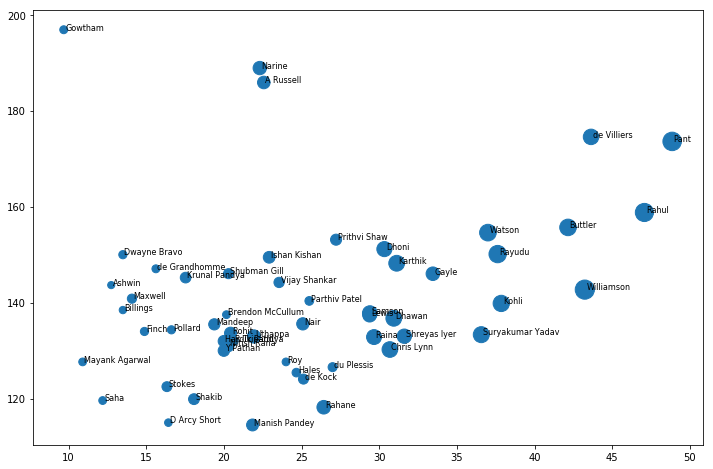

In [33]:
aa = dfps.copy()
aa.dropna(subset=["bat_avg", "bat_sr"], inplace=True)
aa = aa[aa["runs_scored"]>=100]
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

plt.scatter(aa["bat_avg"],aa["bat_sr"], s=aa["runs_scored"]/2)

for i in range(len(aa["bat_avg"])):
    ax.annotate(aa["player"].values[i], xy=(aa["bat_avg"].values[i], aa["bat_sr"].values[i]), 
                xytext=(aa["bat_avg"].values[i]+0.1, aa["bat_sr"].values[i]), size=8)

plt.show()

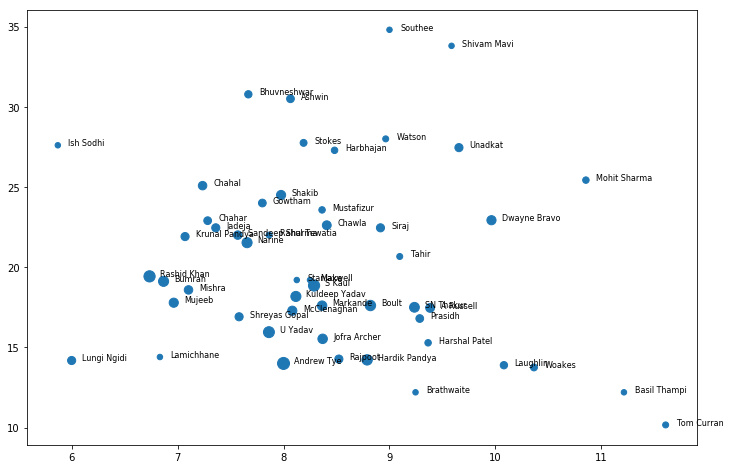

In [35]:
aa = dfps.copy()
aa.dropna(subset=["bowl_econ", "bowl_sr"], inplace=True)
aa = aa[aa["wickets"]>=5]
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

plt.scatter(aa["bowl_econ"],aa["bowl_sr"], s=aa["wickets"]*6)

for i in range(len(aa["bowl_econ"])):
    ax.annotate(aa["player"].values[i], xy=(aa["bowl_econ"].values[i], aa["bowl_sr"].values[i]), 
                xytext=(aa["bowl_econ"].values[i]+0.1, aa["bowl_sr"].values[i]), size=8)

plt.show()

### Per season venue wise statistics: to make player statistics venue and season (=>pitch) neutral


In [10]:
### Median bat_avg * bat_sr for each venue during different seasons
dfv = dfp.copy()
dfv = dfv[dfv["runs_scored"]>=20]
dfv = dfv.groupby(["season","venue"]).median()[["bat_avg","bat_sr","bat_avgsr"]].reset_index()
dfv.rename(columns={"bat_avg":"sv_bat_avg","bat_sr":"sv_bat_sr", "bat_avgsr":"sv_bat_avgsr"}, inplace=True)

### Standard deviation: batting average, batting strike rate
df1 = dfp.copy()
df1 = df1[df1["runs_scored"]>=20]
df1 = df1.groupby(["season","venue"]).std()[["bat_avg","bat_sr"]].reset_index()
df1.rename(columns={"bat_avg":"sv_std_bat_avg","bat_sr":"sv_std_bat_sr"}, inplace=True)

dfv = dfv.set_index(["season","venue"]).join(df1.set_index(["season","venue"])).reset_index()

### Median bowling average, bowling economy for each venue
df1 = dfp.copy()
df1 = df1[np.isfinite(df1["bowl_avg"])]
df1 = df1[np.isfinite(df1["bowl_sr"])]
df1 = df1[np.isfinite(df1["bowl_econ"])]
df1 = df1[df1["balls_bowled"]>=12]
df1 = df1.groupby(["season","venue"]).median()[["bowl_avg","bowl_econ"]].reset_index()

dfv = dfv.set_index(["season","venue"]).join(df1.set_index(["season","venue"])).reset_index()
dfv.rename(columns={"bowl_avg":"sv_bowl_avg", "bowl_econ":"sv_bowl_econ","bowl_avgecon":"sv_bowl_avgecon"}, inplace=True)

### Standard deviation: bowling average, bowling economy for each venue
df1 = dfp.copy()
df1 = df1[np.isfinite(df1["bowl_avg"])]
df1 = df1[np.isfinite(df1["bowl_sr"])]
df1 = df1[np.isfinite(df1["bowl_econ"])]
df1 = df1[df1["balls_bowled"]>=12]
df1 = df1.groupby(["season","venue"]).std()[["bowl_avg","bowl_econ"]].reset_index()
df1.rename(columns={"bowl_avg":"sv_std_bowl_avg","bowl_econ":"sv_std_bowl_econ"}, inplace=True)

dfv = dfv.set_index(["season","venue"]).join(df1.set_index(["season","venue"])).reset_index()
dfv.head(3)

,season,venue,sv_bat_avg,sv_bat_sr,sv_bat_avgsr,sv_std_bat_avg,sv_std_bat_sr,sv_bowl_avg,sv_bowl_econ,sv_std_bowl_avg,sv_std_bowl_econ
0,2018,"Eden Gardens, Kolkata",29.5,144.000000,40.041667,14.056699,55.753749,22.0,8.148148,14.351376,2.593714
1,2018,"Feroz Shah Kotla, Delhi",32.0,154.086022,48.492992,21.169752,40.897111,23.0,8.111111,13.052581,2.667842
2,2018,"Holkar Cricket Stadium, Indore",27.5,158.823529,42.371409,15.716410,38.341303,28.0,9.111111,24.907567,3.156019


### Merge player and venue statistics


In [11]:
dfpv = dfp.set_index(["season","venue"]).join(dfv.set_index(["season","venue"])).reset_index()
dfpv = dfpv[["season","venue","team","player","runs_scored","bat_avg","bat_sr","bat_avgsr",
             "sv_bat_avg","sv_bat_sr","sv_bat_avgsr","sv_std_bat_avg","sv_std_bat_sr", "wickets",
             "balls_bowled","bowl_avg","bowl_sr","bowl_econ","sv_bowl_avg","sv_bowl_econ",
             "sv_std_bowl_avg","sv_std_bowl_econ"]]

### Batting metric 

In [12]:
dfbat = dfpv.copy()

dfbat = dfbat[dfbat["runs_scored"]>=20]
dfbat.loc[dfbat["runs_scored"]==0,"bat_avg"] = dfbat.loc[dfbat["runs_scored"]==0,"sv_bat_avg"]
dfbat.loc[dfbat["runs_scored"]==0,"bat_sr"]  = dfbat.loc[dfbat["runs_scored"]==0,"sv_bat_sr"]

dfbat["zs_bat_avg"] = (dfbat["bat_avg"]-dfbat["sv_bat_avg"])/dfbat["sv_std_bat_avg"]
dfbat["zs_bat_sr"]  = (dfbat["bat_sr"]-dfbat["sv_bat_sr"])/dfbat["sv_std_bat_sr"]
dfbat = dfbat.groupby(["season","team","player"]).sum()[["runs_scored","zs_bat_avg","zs_bat_sr"]].reset_index()

### Weights
wr = 2; wa=2; ws=1
dfbat["bat_venue"] = wr*dfbat["runs_scored"] + wa*dfbat["zs_bat_avg"]  +  ws*dfbat["zs_bat_sr"]

In [13]:
aa = dfbat[(dfbat["season"]==2018)]
aa.sort_values("bat_venue", ascending=False).head(5)

,season,team,player,runs_scored,zs_bat_avg,zs_bat_sr,bat_venue
86,2018,Sunrisers Hyderabad,Williamson,735.0,7.732841,0.030716,1485.496398
16,2018,Delhi Daredevils,Pant,666.0,5.974683,6.519642,1350.469007
30,2018,Kings XI Punjab,Rahul,652.0,9.486524,2.798812,1325.771859
7,2018,Chennai Super Kings,Rayudu,590.0,5.538682,0.052447,1191.129811
53,2018,Rajasthan Royals,Buttler,542.0,5.285529,3.887862,1098.458920


### Bowling metric

In [14]:
dfball=dfpv.copy()

dfball.loc[dfball["wickets"]==0,"bowl_avg"] = dfball.loc[dfball["wickets"]==0,"sv_bowl_avg"]
dfball = dfball[dfball["balls_bowled"]>=12]

dfball["zs_bowl_avg"] = (dfball["sv_bowl_avg"]-dfball["bowl_avg"])/dfball["sv_std_bowl_avg"]
dfball["zs_bowl_econ"] =(dfball["sv_bowl_econ"]-dfball["bowl_econ"])/dfball["sv_std_bowl_econ"]
dfball = dfball.groupby(["season","team","player"]).sum()[["wickets","zs_bowl_avg","zs_bowl_econ"]].reset_index()

### Weights
ww = 1; wa=1; we=1
dfball["bowl_venue"] = ww*dfball["wickets"] + wa*dfball["zs_bowl_avg"]  +  we*dfball["zs_bowl_econ"]

In [15]:
aa = dfball[dfball["season"]==2018]
aa.sort_values("bowl_venue", ascending=False).head(10)

,season,team,player,wickets,zs_bowl_avg,zs_bowl_econ,bowl_venue
26,2018,Kings XI Punjab,Andrew Tye,24.0,3.788434,2.308515,30.096949
76,2018,Royal Challengers Bangalore,U Yadav,20.0,1.798460,2.429266,24.227726
45,2018,Mumbai Indians,Bumrah,17.0,1.682735,5.536982,24.219717
87,2018,Sunrisers Hyderabad,Rashid Khan,21.0,0.076762,2.200880,23.277642
31,2018,Kings XI Punjab,Mujeeb,14.0,0.682305,5.160632,19.842937
49,2018,Mumbai Indians,Hardik Pandya,18.0,1.521099,-0.712049,18.809050
88,2018,Sunrisers Hyderabad,S Kaul,21.0,0.583791,-3.562140,18.021651
50,2018,Mumbai Indians,Krunal Pandya,11.0,1.192859,5.223219,17.416079
38,2018,Kolkata Knight Riders,Narine,17.0,0.281081,-1.172594,16.108487
67,2018,Royal Challengers Bangalore,Chahal,12.0,1.680344,2.164304,15.844647


In [20]:
dfbat_impact_score = dfbat.copy()
dfbat_impact_score.to_csv("data/dfbat_impact_score.csv", index=False)

dfball_impact_score = dfball.copy()
dfball_impact_score.to_csv("data/dfball_impact_score.csv", index=False)

### Team

In [16]:
dfps = dfp.groupby(["season","team","player"]).sum()[["runs_scored","balls_faced","num_innings",
                                                      "wickets","balls_bowled","runs_conceded"]].reset_index()
dfps["bat_avg"] = dfps["runs_scored"]/dfps["num_innings"]
dfps["bat_sr"]  = dfps["runs_scored"]/dfps["balls_faced"] * 100

dfps["bowl_avg"]= dfps["runs_conceded"]/dfps["wickets"]
dfps["bowl_sr"] = dfps["balls_bowled"]/dfps["wickets"]
dfps["bowl_econ"]=dfps["runs_conceded"]/dfps["balls_bowled"]*6

df1 = dfbat.copy()
del df1["runs_scored"]
dfps = dfps.set_index(["season","team","player"]).join(df1.set_index(["season","team","player"])).reset_index()

df1 = dfball.copy()
del df1["wickets"]
dfps = dfps.set_index(["season","team","player"]).join(df1.set_index(["season","team","player"])).reset_index()

### Batting Weights
wr = 2; wa=2; ws=1
dfps["bat_venue"] = wr*dfps["runs_scored"] + wa*dfps["zs_bat_avg"]  +  ws*dfps["zs_bat_sr"]

### Bowling Weights
ww = 1; wa=1; we=1
dfps["bowl_venue"] = ww*dfps["wickets"] + wa*dfps["zs_bowl_avg"]  +  we*dfps["zs_bowl_econ"]

In [17]:
dft = dfps.groupby(["season","team"]).sum()[["bat_venue","bowl_venue"]].reset_index()
dft

,season,team,bat_venue,bowl_venue
0,2018,Chennai Super Kings,5280.527411,54.663235
1,2018,Delhi Daredevils,4446.579048,47.600549
2,2018,Kings XI Punjab,4106.789504,64.063950
3,2018,Kolkata Knight Riders,5214.576578,60.918648
4,2018,Mumbai Indians,4430.650158,91.420198
5,2018,Rajasthan Royals,4490.920486,47.311771
6,2018,Royal Challengers Bangalore,4351.946484,59.992995
7,2018,Sunrisers Hyderabad,5113.691608,79.820739


### Player types

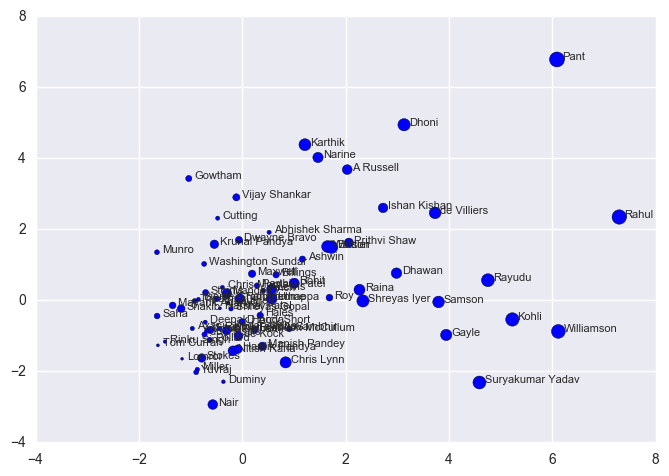

In [85]:
aa = dfps.copy()
fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(aa["zs_bat_avg"],aa["zs_bat_sr"], s=aa["runs_scored"]/5)

for i in range(len(aa["zs_bat_avg"])):
    ax.annotate(aa["player"].values[i], xy=(aa["zs_bat_avg"].values[i], aa["zs_bat_sr"].values[i]), 
                xytext=(aa["zs_bat_avg"].values[i]+0.1, aa["zs_bat_sr"].values[i]), size=8)

plt.show()

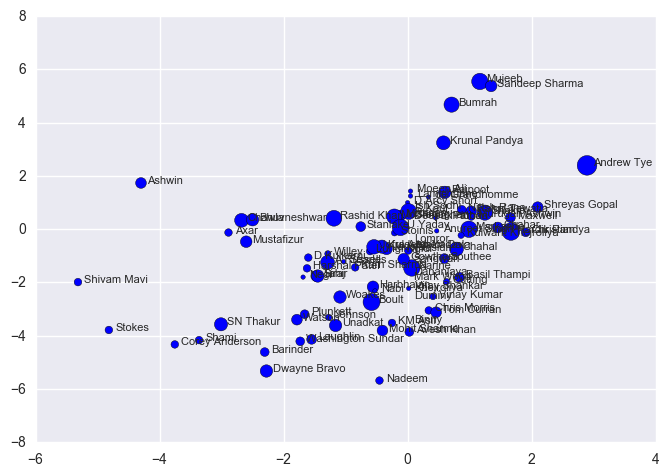

In [86]:
aa = dfps.copy()
fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(aa["zs_bowl_avg"],aa["zs_bowl_econ"], s=aa["wickets"]*10)

for i in range(len(aa["zs_bowl_avg"])):
    ax.annotate(aa["player"].values[i], xy=(aa["zs_bowl_avg"].values[i], aa["zs_bowl_econ"].values[i]), 
                xytext=(aa["zs_bowl_avg"].values[i]+0.1, aa["zs_bowl_econ"].values[i]), size=8)

plt.show()

In [79]:
dfps

,season,team,player,runs_scored,balls_faced,num_innings,wickets,balls_bowled,runs_conceded,bat_avg,bat_sr,bowl_avg,bowl_sr,bowl_econ,zs_bat_avg,zs_bat_sr,bat_venue,zs_bowl_avg,zs_bowl_econ,bowl_venue
0,2018,Chennai Super Kings,Billings,107.0,72.0,6.0,0.0,0.0,0.0,17.833333,148.611111,NaN,NaN,NaN,0.654836,0.715820,216.025491,NaN,NaN,NaN
1,2018,Chennai Super Kings,Chahar,0.0,1.0,1.0,6.0,115.0,153.0,0.000000,0.000000,25.500000,19.166667,7.982609,NaN,NaN,NaN,1.454730,0.063203,7.517933
2,2018,Chennai Super Kings,Dhoni,393.0,239.0,11.0,0.0,0.0,0.0,35.727273,164.435146,NaN,NaN,NaN,3.131758,4.939284,797.202800,NaN,NaN,NaN
3,2018,Chennai Super Kings,Dwayne Bravo,127.0,77.0,8.0,8.0,201.0,332.0,15.875000,164.935065,41.500000,25.125000,9.910448,-0.063558,1.697338,255.570222,-2.276884,-5.324722,0.398393
4,2018,Chennai Super Kings,Harbhajan,8.0,5.0,1.0,7.0,161.0,207.0,8.000000,160.000000,29.571429,23.000000,7.714286,NaN,NaN,NaN,-0.557596,-2.163081,4.279323
5,2018,Chennai Super Kings,Jadeja,59.0,51.0,6.0,7.0,157.0,200.0,9.833333,115.686275,28.571429,22.428571,7.643312,NaN,NaN,NaN,-0.340009,-0.740306,5.919685
6,2018,Chennai Super Kings,KM Asif,0.0,0.0,0.0,3.0,36.0,75.0,NaN,NaN,25.000000,12.000000,12.500000,NaN,NaN,NaN,-0.252199,-3.521061,-0.773260
7,2018,Chennai Super Kings,Karn Sharma,0.0,0.0,0.0,3.0,39.0,64.0,NaN,NaN,21.333333,13.000000,9.846154,NaN,NaN,NaN,-0.845551,-1.434152,0.720297
8,2018,Chennai Super Kings,Kedar Jadhav,24.0,21.0,1.0,0.0,0.0,0.0,24.000000,114.285714,NaN,NaN,NaN,-0.261816,-0.774607,46.701761,NaN,NaN,NaN
9,2018,Chennai Super Kings,Lungi Ngidi,0.0,0.0,0.0,3.0,66.0,86.0,NaN,NaN,28.666667,22.000000,7.818182,NaN,NaN,NaN,-0.604333,-0.824267,1.571400
